In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bar_parallax_analytic_model import bar_parallax3D

# We can test with different bar structure parameters
custom_params = {
    'sigma_x': 0.67,  # Longer bar major axis
    'sigma_y': 0.29,  # Shorter bar minor axis
    'sigma_z': 0.27,  # Thinner bar vertically
    'r_E': 8.2,       # Closer bar center
    's_max': 15.0,     # Max distance from us for averaging
    #'epsrel': 1e-6    # Relative error tolerance for integration
}

In [2]:


# Parameters
fixed_bar_angle = 25.0  # degrees
fixed_b_deg = -2.0      # degrees
longitude_range = np.arange(-15, 16)  # degrees
#solid_angle = 10/3600  # solid angle in deg^2

/var/folders/8l/p90_cj915l7dtkqz4wc5w59r0000gn/T/ipykernel_6418/2055994806.py:32: RuntimeWarning: divide by zero encountered in divide
  axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))


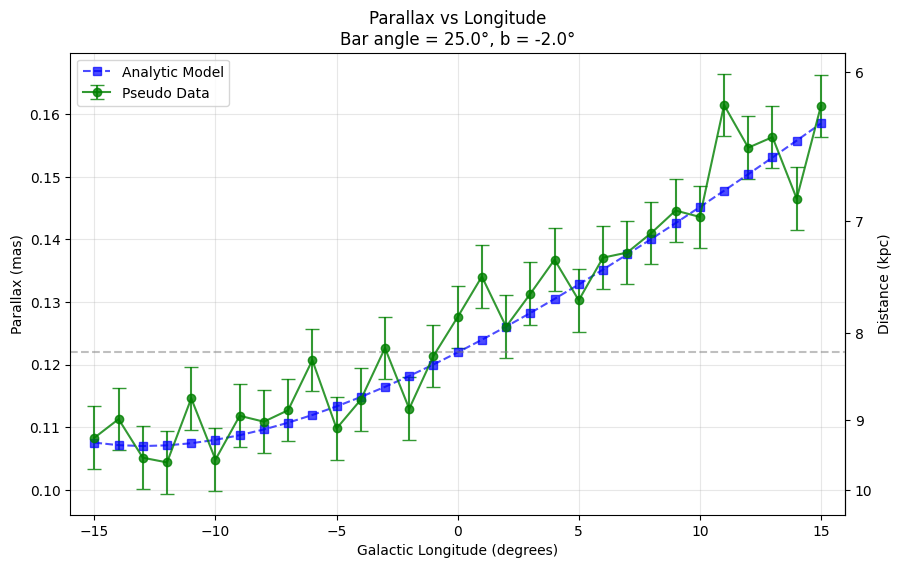

In [3]:
#Generating pseudo-data using analytic model with some noise (skip this if you have real data)
import pandas as pd

analytic_parallaxes = []
for l in longitude_range:
    #distance = compute_bar_distance(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    parallax = bar_parallax3D(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    analytic_parallaxes.append(parallax)


sigma = 0.005  # mas

parallax_data = np.array(analytic_parallaxes)+np.random.normal(0, sigma, size=len(analytic_parallaxes))
parallax_error = np.array([sigma]*len(analytic_parallaxes))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(longitude_range, parallax_data, 
            yerr=parallax_error, 
            fmt='o-', color='green', alpha=0.8, label='Pseudo Data', 
            capsize=5, markersize=6)
ax.plot(longitude_range, analytic_parallaxes, 
        's--', color='blue', alpha=0.7, label='Analytic Model', markersize=6)
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel(f'Parallax (mas)')
ax.set_title(f'Parallax vs Longitude\nBar angle = {fixed_bar_angle}°, b = {fixed_b_deg}°')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim(-16, 16)
ax.axhline(1/8.2, color='gray', linestyle='--', alpha=0.5)

axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))
axsec.set_ylabel('Distance (kpc)')

#plt.savefig('bar_angle_analytic_model_comparison.pdf', dpi=300)
plt.show()

100%|██████████| 2000/2000 [12:36<00:00,  2.64it/s]


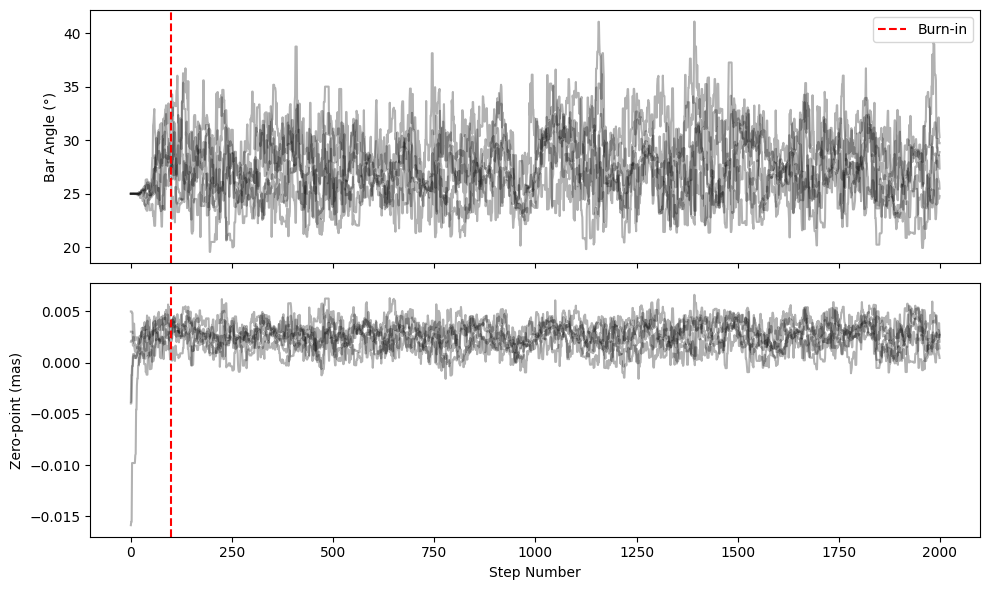

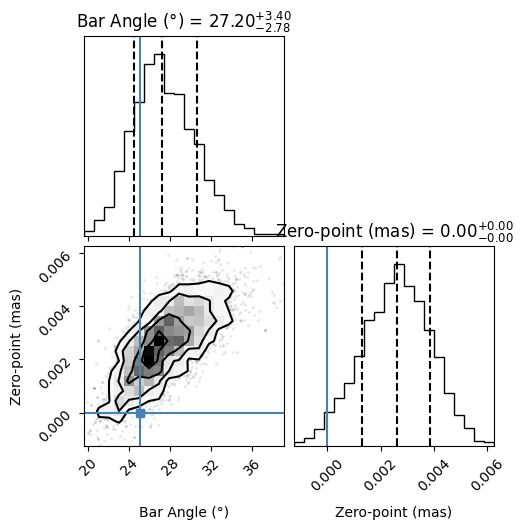

/Users/himanshuverma/Documents/MyHome/MyHomeLSU/Research/Topics/Roman/GaiaBarAngle/Bar-Angle-Calculator/bar_angle_fitter.py:196: RuntimeWarning: divide by zero encountered in divide
  axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))


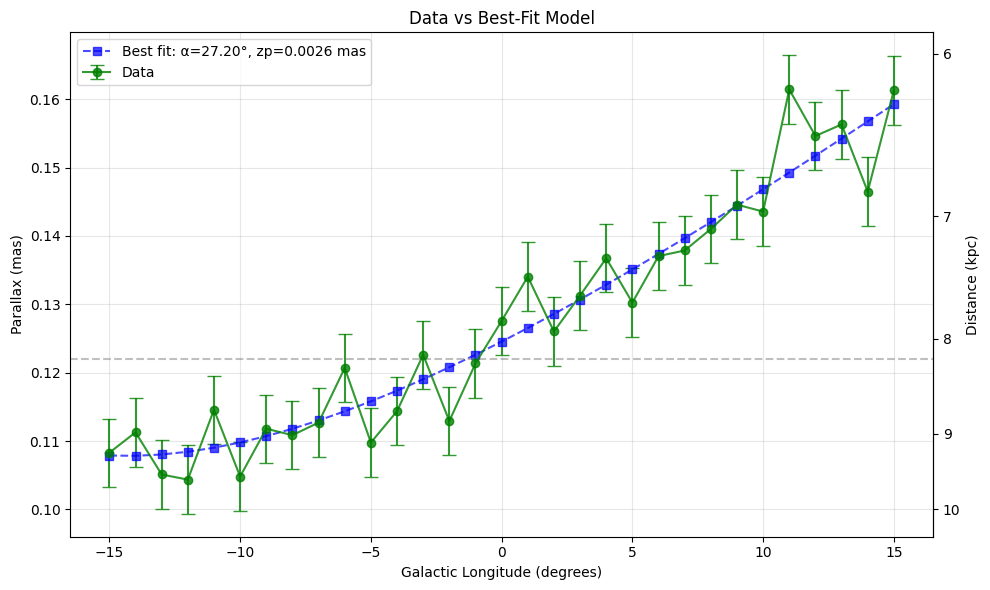

Bar angle: 27.20° $\pm$ 3.07°
Zero-point: 0.0026 $\pm$ 0.0013 mas


In [4]:
from bar_angle_fitter import BarAngleFitter

# Create fitter with your data
fitter = BarAngleFitter(
    parallax_data=parallax_data,
    parallax_error=parallax_error,
    l_values=longitude_range,
    b_values=fixed_b_deg,
    model_params=custom_params
)

# Run MCMC
fitter.run_mcmc(n_walkers=6, n_steps=2000, n_burn=100, thin=3, initial_guess=[25.0, 0.0], priors_range=[(0, 90), (-0.05, 0.05)])

# Plot all results (chains, corner plot, fit)
fitter.plot_results(truths=[fixed_bar_angle, 0.0])

# Get numerical results
results = fitter.get_results()
print(f"Bar angle: {results['bar_angle']['median']:.2f}° $\\pm$ {results['bar_angle']['std']:.2f}°")
print(f"Zero-point: {results['zp']['median']:.4f} $\\pm$ {results['zp']['std']:.4f} mas")